# M2 - Mathematical Formalism and Fundamental Concepts

## 1.2 Coin Flip Experiment

### Task 1: Simulating FairCoin in Python

In [85]:
from random import randrange    

# number of coin flips to simulate
num_flips = [100,1000,10000,100000,1000000]

# simulate coin flips and calculate heads/tails ratio
for flip in num_flips:
    heads = tails = 0

    # perform the coin flips
    for _ in range(flip):

        # simulate a fair coin flip
        if randrange(2) == 0:
            heads += 1
        else:
            tails += 1
            
    print("\nNo. of flips:", flip)    
    print("Heads:", heads)
    print("Tails:", tails)
    print("Ratio of Heads to Tails:", heads / tails if tails != 0 else 'Infinity')



No. of flips: 100
Heads: 47
Tails: 53
Ratio of Heads to Tails: 0.8867924528301887

No. of flips: 1000
Heads: 494
Tails: 506
Ratio of Heads to Tails: 0.9762845849802372

No. of flips: 10000
Heads: 4992
Tails: 5008
Ratio of Heads to Tails: 0.9968051118210862

No. of flips: 100000
Heads: 50071
Tails: 49929
Ratio of Heads to Tails: 1.0028440385347193

No. of flips: 1000000
Heads: 500096
Tails: 499904
Ratio of Heads to Tails: 1.0003840737421585


### Task 2: Simulating BiasedCoin in Python

Flip the following biased coin 100 times. Calculate the total numbers of heads and tails, and then check the ratio of the number of heads and the number of tails.

$
BiasedCoin = \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & 0.6 & 0.6 \\  \mathbf{Tail} & 0.4 & 0.4  \end{array}
$


Do the same experiment 1000 times.

Do the same experiment 10,000 times.

Do the same experiment 100,000 times.

Do your results get close to the ideal case $ \frac{\text{\# of heads}}{\text{\# of tails}} = \frac{0.6}{0.4} = 1.500000$?


In [89]:
from random import randrange

# simulate unfair coin flips
print("\nSimulating Unfair Coin Flips")

# number of coin flips to simulate
num_flips = [100, 1000, 10000, 100000, 1000000]

# simulate coin flips and calculate heads/tails ratio
for flip in num_flips:

    # initialize counters
    heads = tails = 0

    # perform the coin flips
    for _ in range(flip):

        # simulate a unfair coin flip
        if randrange(100) < 60:  # 60% chance for heads
            heads += 1
        else:                # 40% chance for tails
            tails += 1 

    print("\nNo. of flips:", flip)
    print("Heads:", heads)
    print("Tails:", tails)
    print("Ratio of Heads to Tails:", heads / tails if tails != 0 else "Infinity")


Simulating Unfair Coin Flips

No. of flips: 100
Heads: 58
Tails: 42
Ratio of Heads to Tails: 1.380952380952381

No. of flips: 1000
Heads: 619
Tails: 381
Ratio of Heads to Tails: 1.6246719160104988

No. of flips: 10000
Heads: 5954
Tails: 4046
Ratio of Heads to Tails: 1.471576866040534

No. of flips: 100000
Heads: 60118
Tails: 39882
Ratio of Heads to Tails: 1.5073968206208315

No. of flips: 1000000
Heads: 599891
Tails: 400109
Ratio of Heads to Tails: 1.4993189355900518


---

### Extra: Programming a biased coin </h3>

We use a simple method to create a biased coin.

First, we pick a range for the precision of probabilities, say $ N $, as $ N = 11, 101, 1001, \text{ or }, 10^k+1 $ for some $ k > 3 $.

Second, we pick the bias, say $ B $, as an integer in $ \{0,\ldots,N\} $.

We fix $ N $ and $ B $.

Third, we pick a random integer in $ \{0,1,\ldots,N-1\} $:

- if it is less than $ B $, we output "Heads" and
- if it is equal to or greater than $ B $, we output "Tails"

    
In this way, we have a biased coin "landing on" heads with probability $ \frac{B}{N} $ including 0 and 1.

Remark that we pick $ N = 10^k+1 $ as an odd number. In this way, the coin cannot be fair as long as $ B $ is an integer. Because, the half of an odd integer is not an integer.

### Task 3 

Write a function to implement the described biased coin,

The inputs are integers $N>0$ and $ B \in \{0,\ldots,N\} $.

The output is either "Heads" or "Tails".

In [4]:
def biased_coin(N,B):
    if randrange(N) < B:
        return 'H'
    else:
        return 'T'

### Task 4

- pick N = 101
- determine B value experimentally without checking its values directly
- flip biased coin 500 times, collect statistics and guess the bias, compare your guess with actual bias 

In [5]:
from random import randrange
N = 101
B = randrange(N+1)

In [12]:
total_flips = 1000000
no_of_heads = 0

# flip the biased coin total_flips times
for _ in range(total_flips):
    if biased_coin(N, B) == 'H':
        no_of_heads += 1

my_guess = no_of_heads / total_flips
real_bias = B / N
error = abs(my_guess - real_bias)/real_bias * 100

print("my guess is", my_guess)
print("real bias is", real_bias)
print("error (%) is", error)

my guess is 0.850822
real bias is 0.8514851485148515
error (%) is 0.0778813953488386


## 1.3.1 Two Coin Flip Experiment

### Task 1

The game
Our friend Asja has one euro and one cent.

Both coins are biased, and the probabilities of getting heads and tails are as follows:

- one euro: heads with probability 0.6 and tails with probability 0.4.
- one cent: heads with probability 0.3 and tails with probability 0.7.
  
Asja flips her coins based on the following protocol:

- she starts with flipping one euro[*];
- whenever she gets heads, she flips one euro in the next round; and,
- whenever she gets tails, she flips one cent in the next round.

**Tracing Asja's three coin tosses**

Suppose that Asja secretly tosses her coins based on the defined protocol.

By using python, we can calculate the probabilities of Asja seeing heads and tails after three coin tosses.

In [1]:
# intial condition
# asja will start with one euro and
# we assume that the probability of heads is 1 at the beginning

prob_heads = 1
prob_tails = 0

# first coin flip

new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

prob_heads = new_prob_heads
prob_tails = new_prob_tails

# second coin flip
new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

prob_heads = new_prob_heads
prob_tails = new_prob_tails

# third coin flip
new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

prob_heads = new_prob_heads
prob_tails = new_prob_tails

# print prob_head and prob_tail
print("the probability of getting head after 3 coin tosses is", prob_heads)
print("the probability of getting tail after 3 coin tosses is", prob_tails)

the probability of getting head after 3 coin tosses is 0.44399999999999995
the probability of getting tail after 3 coin tosses is 0.556


### Task 2: Tracing ten biased coin tosses

By using python, calculate the probabilities of Asja seeing heads and tails after 10 coin tosses.

$
GameCoins = \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & 0.6 & 0.3\\  \mathbf{Tail} & 0.4 & 0.7  \end{array} = \begin{array}{c|cc} \hookleftarrow & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 0.6 & 0.3 \\  \mathbf{1} & 0.4 & 0.7  \end{array}
$

Use a loop in your solution.

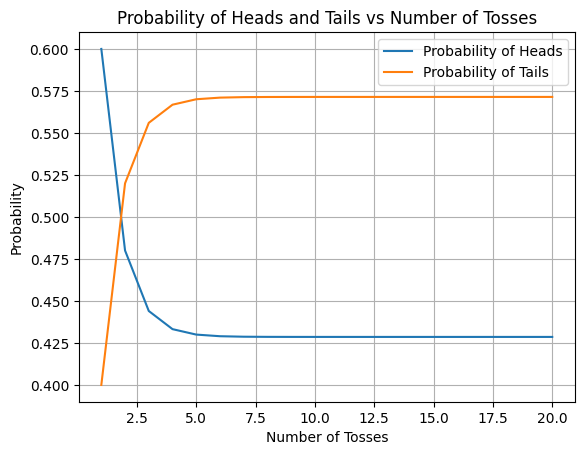

the probability of getting head after 10 coin tosses is 0.42857142859135267
the probability of getting tail after 10 coin tosses is 0.5714285714086464


In [ ]:
# Plot no of tosses vs probability of heads
import matplotlib.pyplot as plt

prob_heads = 1
prob_tails = 0
prob_heads_list = []
prob_tails_list = []
num_tosses = list(range(1, 21))

for _ in num_tosses:
    new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
    new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

    prob_heads = new_prob_heads
    prob_tails = new_prob_tails
    prob_heads_list.append(prob_heads)
    prob_tails_list.append(prob_tails)
    
plt.plot(num_tosses, prob_heads_list, label='Probability of Heads')
plt.plot(num_tosses, prob_tails_list, label='Probability of Tails')
plt.xlabel('Number of Tosses')
plt.ylabel('Probability')
plt.title('Probability of Heads and Tails vs Number of Tosses')
plt.legend()
plt.grid()
plt.show()

print("the probability of getting head after 10 coin tosses is", prob_heads)
print("the probability of getting tail after 10 coin tosses is", prob_tails)




### Task 3

Repeat Task 2 for 20, 30, and 50 coin tosses.

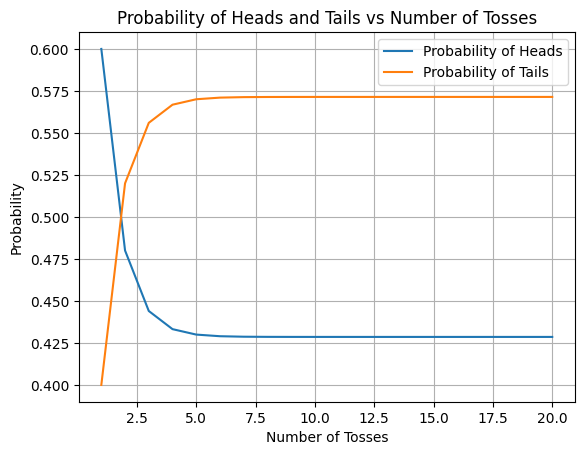

the probability of getting head after 20 coin tosses is 0.42857142859135267
the probability of getting tail after 20 coin tosses is 0.5714285714086464


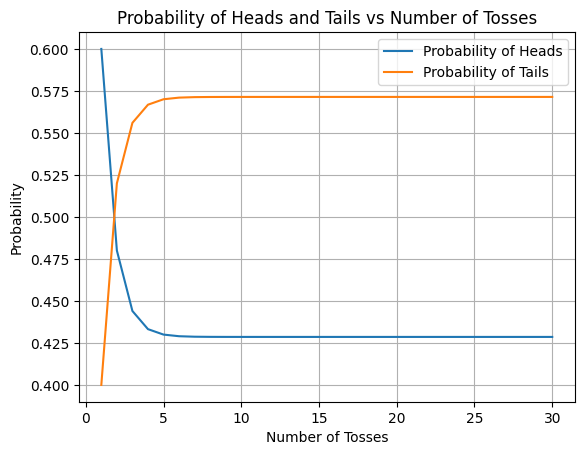

the probability of getting head after 30 coin tosses is 0.42857142857142816
the probability of getting tail after 30 coin tosses is 0.5714285714285705


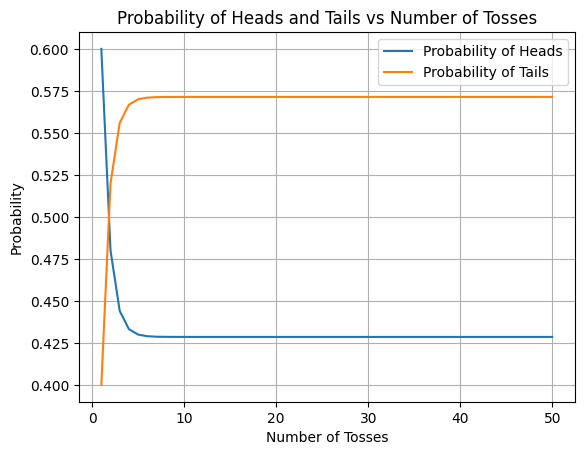

the probability of getting head after 50 coin tosses is 0.42857142857142805
the probability of getting tail after 50 coin tosses is 0.5714285714285706


In [21]:
# Plot no of tosses vs probability of heads
import matplotlib.pyplot as plt
iteraitions = [20, 30, 50]

for it in iteraitions:
    prob_heads = 1
    prob_tails = 0
    prob_heads_list = []
    prob_tails_list = []
    num_tosses = list(range(1, it+1))

    for _ in num_tosses:
        new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
        new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

        prob_heads = new_prob_heads
        prob_tails = new_prob_tails
        prob_heads_list.append(prob_heads)
        prob_tails_list.append(prob_tails)

    plt.plot(num_tosses, prob_heads_list, label="Probability of Heads")
    plt.plot(num_tosses, prob_tails_list, label="Probability of Tails")
    plt.xlabel("Number of Tosses")
    plt.ylabel("Probability")
    plt.title("Probability of Heads and Tails vs Number of Tosses")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"the probability of getting head after {it} coin tosses is", prob_heads)
    print(f"the probability of getting tail after {it} coin tosses is", prob_tails)

### Task 4 

Repeat Task 2 for 10, 20, and 50 coin tosses by picking different initial conditions, e.g.,
    
    prob_head = prob_tail = 1/2
or
    
    prob_head = 0
    prob_tail = 1

probability of head is 0.5
probability of tail is 0.5



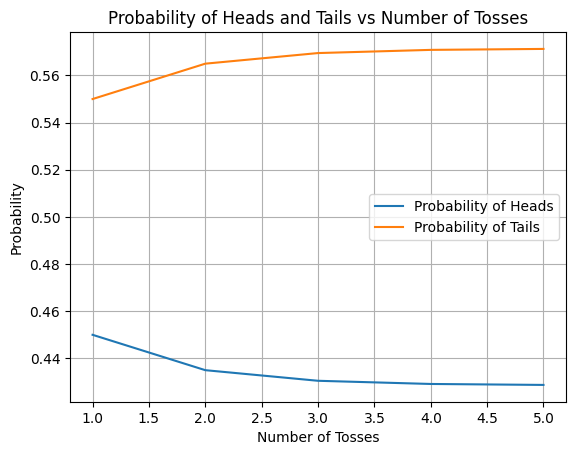

the probability of getting head after 5 coin tosses is 0.42874499999999993
the probability of getting tail after 5 coin tosses is 0.5712549999999998


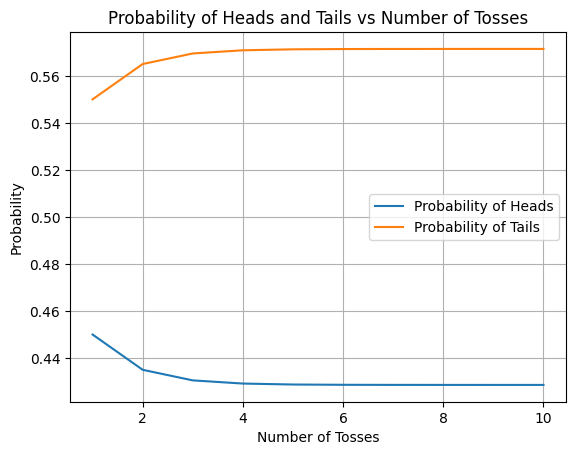

the probability of getting head after 10 coin tosses is 0.4285718503499998
the probability of getting tail after 10 coin tosses is 0.5714281496499998
probability of head is 0
probability of tail is 1



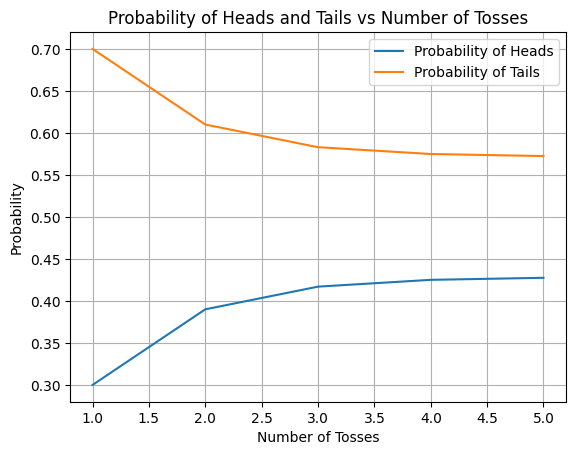

the probability of getting head after 5 coin tosses is 0.42752999999999997
the probability of getting tail after 5 coin tosses is 0.5724699999999999


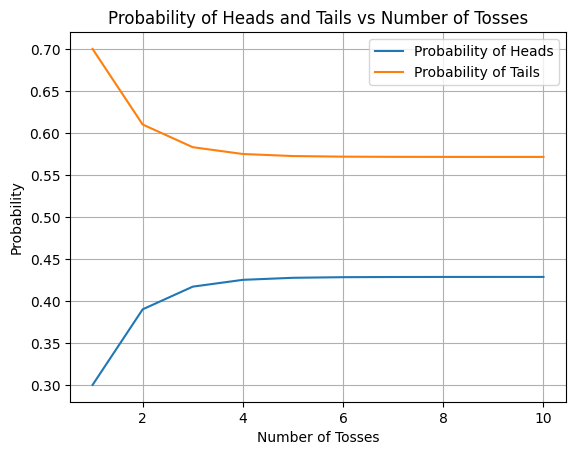

the probability of getting head after 10 coin tosses is 0.42856889789999986
the probability of getting tail after 10 coin tosses is 0.5714311020999998


In [28]:
# Plot no of tosses vs probability of heads
import matplotlib.pyplot as plt

iterations = [5,10]

initial_conditions = [[1/2,1/2],[0,1]]

for initial_prob_pairs in initial_conditions:
    print("probability of head is", initial_prob_pairs[0])
    print("probability of tail is", initial_prob_pairs[1])
    print()

    for it in iterations:
        [prob_heads , prob_tails] = initial_prob_pairs

        prob_heads_list = []
        prob_tails_list = []
        num_tosses = list(range(1, it + 1))

        for _ in num_tosses:

            new_prob_heads = prob_heads * 0.6 + prob_tails * 0.3
            new_prob_tails = prob_heads * 0.4 + prob_tails * 0.7

            prob_heads = new_prob_heads
            prob_tails = new_prob_tails

            prob_heads_list.append(prob_heads)
            prob_tails_list.append(prob_tails)

        plt.plot(num_tosses, prob_heads_list, label="Probability of Heads")
        plt.plot(num_tosses, prob_tails_list, label="Probability of Tails")
        plt.xlabel("Number of Tosses")
        plt.ylabel("Probability")
        plt.title("Probability of Heads and Tails vs Number of Tosses")
        plt.legend()
        plt.grid()
        plt.show()

        print(f"the probability of getting head after {it} coin tosses is", prob_heads)
        print(f"the probability of getting tail after {it} coin tosses is", prob_tails)